<a href="https://colab.research.google.com/github/SurabhiSharma-hub/Suru-puddle/blob/main/Zn_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd

df = pd.read_excel('/content/SOIL_LEDS_DATA_Zn.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample     25 non-null     int64  
 1   L1 (mV)    25 non-null     float64
 2   L4         25 non-null     float64
 3   L7         25 non-null     float64
 4   Target_Zn  25 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


,sample,L1 (mV),L4,L7,Target_Zn
0,1,15.80,70.07,77.93,1.968534
1,2,20.87,63.87,70.33,1.226813
2,3,21.53,63.20,70.47,1.485303
3,4,21.93,61.73,69.40,2.115298
4,5,20.80,64.87,71.27,0.576947


In [62]:
import pandas as pd


df = pd.read_excel('/content/SOIL_LEDS_DATA_Zn.xlsx')
c1=df.drop(['sample'], axis=1)
c1.head()


,L1 (mV),L4,L7,Target_Zn
0,15.80,70.07,77.93,1.968534
1,20.87,63.87,70.33,1.226813
2,21.53,63.20,70.47,1.485303
3,21.93,61.73,69.40,2.115298
4,20.80,64.87,71.27,0.576947


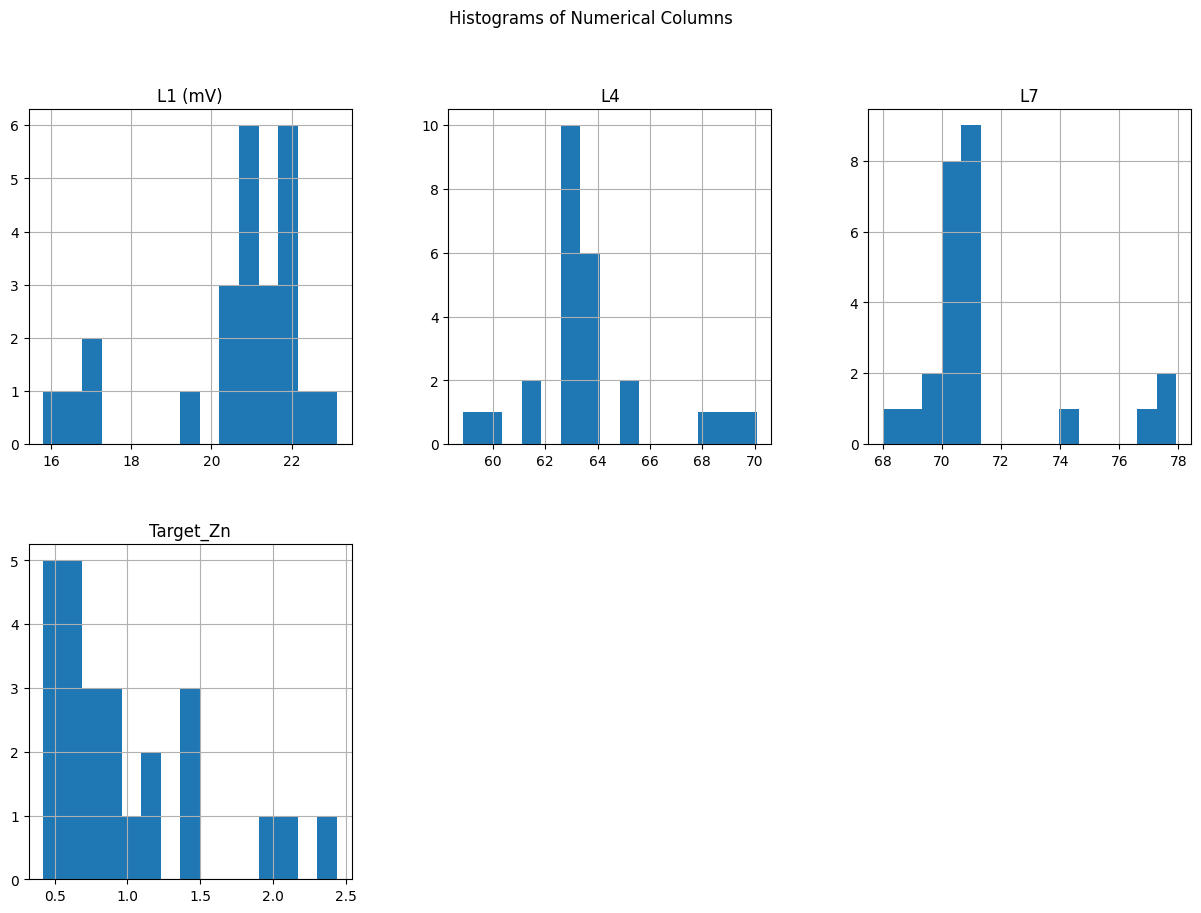

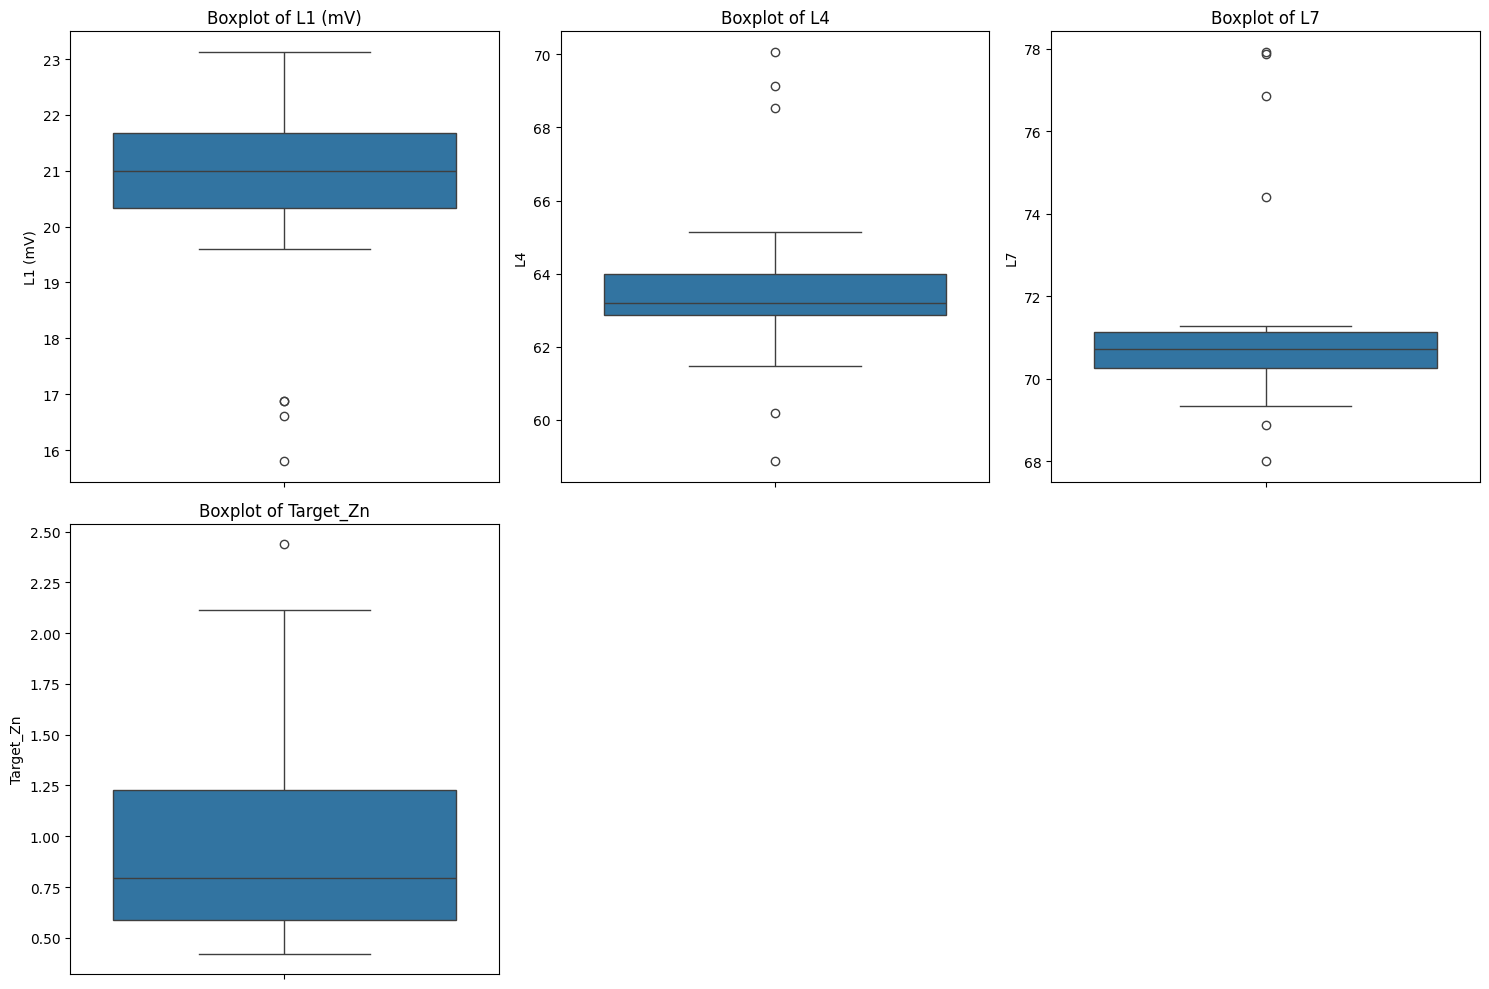

In [63]:
#Data visualization
# Histograms for numerical columns
numerical_columns = c1.select_dtypes(include=[np.number]).columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(len(numerical_columns) // 3 + 1, 3))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

#boxplots for numerical columns to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=c1[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


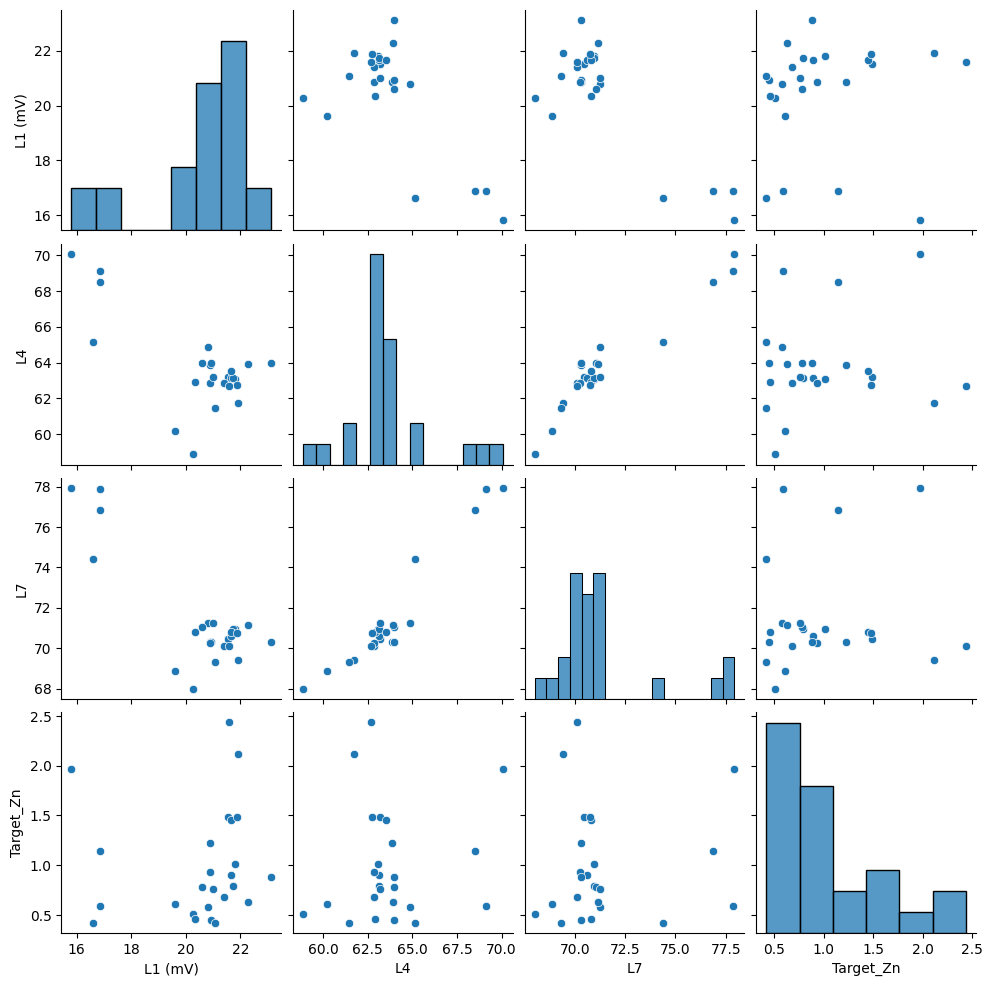

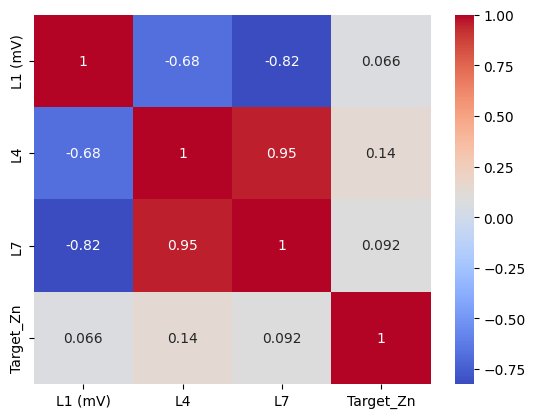

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

#Pairplot
sns.pairplot(c1)
plt.show()

#Correlation matrix
correlation_matrix = c1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [65]:
X=c1.drop('Target_Zn',axis=1)
y=c1['Target_Zn']

print('shape of X=',X.shape)
print('shape of y=',y.shape)



shape of X= (25, 3)
shape of y= (25,)


In [66]:
from sklearn.model_selection import train_test_split

# X and y are feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('shape of X_train =',X_train.shape)
print('shape of X_test =',X_test.shape)
print('shape of y_train =',y_train.shape)
print('shape of y_test =',y_test.shape)





shape of X_train = (20, 3)
shape of X_test = (5, 3)
shape of y_train = (20,)
shape of y_test = (5,)


In [67]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)



[[-2.16952276  2.67541227  2.86408217]
 [-0.11490424 -0.37741852 -0.22737752]
 [ 0.20575876  0.08543002 -0.43289181]
 [ 0.28295541 -0.24447266 -0.02186322]
 [ 0.24138798  0.14944099 -0.43289181]
 [ 0.59768021 -0.24447266 -0.37167479]
 [ 0.52048356 -0.40696204 -0.5203447 ]
 [-2.16952276  2.37997703  2.42681771]
 [ 0.83520836 -0.96828899 -0.83954775]
 [ 0.16419134  0.57782208 -0.02186322]
 [ 0.63924764 -0.50544045 -0.5203447 ]
 [ 0.68081507 -0.08198328 -0.22737752]
 [ 0.79957914 -0.47589693 -0.25798603]
 [ 0.03948906  0.14944099 -0.10931611]
 [-0.54839312 -1.72164884 -1.07129791]
 [-2.32985426  0.70584402  1.34677452]
 [ 0.32452284 -1.09631092 -0.87015626]
 [ 0.20575876 -0.40696204 -0.45912768]
 [ 1.03710729  0.11497355 -0.08308025]
 [ 0.75801172 -0.30848363 -0.17053314]]
[[ 0.68081507 -0.2789401  -0.31483041]
 [ 0.71644429 -0.2789401  -0.17053314]
 [-2.80491057  3.1382608   2.89031803]
 [ 1.54779282  0.14944099 -0.43289181]
 [-0.15053347 -2.37653028 -1.45171798]]


In [68]:
#Min-Max Scalling

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[0.04761905 1.         1.        ]
 [0.65784832 0.30571109 0.21444444]
 [0.75308642 0.41097424 0.16222222]
 [0.77601411 0.33594625 0.26666667]
 [0.76366843 0.42553191 0.16222222]
 [0.86948854 0.33594625 0.17777778]
 [0.84656085 0.29899216 0.14      ]
 [0.04761905 0.93281075 0.88888889]
 [0.94003527 0.17133259 0.05888889]
 [0.74074074 0.52295633 0.26666667]
 [0.88183422 0.27659574 0.14      ]
 [0.89417989 0.37290034 0.21444444]
 [0.92945326 0.28331467 0.20666667]
 [0.7037037  0.42553191 0.24444444]
 [0.52910053 0.         0.        ]
 [0.         0.55207167 0.61444444]
 [0.78835979 0.14221725 0.05111111]
 [0.75308642 0.29899216 0.15555556]
 [1.         0.41769317 0.25111111]
 [0.91710758 0.32138858 0.22888889]]
[[ 0.89417989  0.3281075   0.19222222]
 [ 0.9047619   0.3281075   0.22888889]
 [-0.14109347  1.10526316  1.00666667]
 [ 1.15167549  0.42553191  0.16222222]
 [ 0.64726631 -0.14893617 -0.09666667]]


In [22]:
'''from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled,
X_test_scaled)

[[0.75752133 1.         1.        ]
 [0.91288729 0.9103139  0.90920765]
 [0.93713516 0.92391147 0.90317195]
 [0.94297261 0.91421959 0.91524335]
 [0.93982937 0.92579199 0.90317195]
 [0.96677144 0.91421959 0.90496982]
 [0.96093399 0.90944597 0.90060357]
 [0.75752133 0.9913207  0.98715808]
 [0.98473282 0.8929553  0.89122897]
 [0.93399192 0.93837697 0.91524335]
 [0.96991468 0.90655287 0.90060357]
 [0.97305793 0.9189932  0.90920765]
 [0.98203862 0.9074208  0.90830872]
 [0.92456219 0.92579199 0.91267497]
 [0.88010777 0.87082309 0.88442276]
 [0.7453974  0.942138   0.95543855]
 [0.94611585 0.88919427 0.89033004]
 [0.93713516 0.90944597 0.90240144]
 [1.         0.9247794  0.91344549]
 [0.97889537 0.91233907 0.9108771 ]] [[0.97305793 0.913207   0.90663927]
 [0.97575213 0.913207   0.9108771 ]
 [0.70947463 1.01359757 1.00077051]
 [1.03861697 0.92579199 0.90317195]
 [0.91019308 0.85158397 0.87325029]]


In [100]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled,X_test_scaled)


[[-3.74828375  5.09012876  7.63978495]
 [-0.5812357  -0.23175966  0.03763441]
 [-0.08695652  0.5751073  -0.46774194]
 [ 0.03203661  0.          0.54301075]
 [-0.03203661  0.68669528 -0.46774194]
 [ 0.51716247  0.         -0.3172043 ]
 [ 0.39816934 -0.2832618  -0.6827957 ]
 [-3.74828375  4.5751073   6.56451613]
 [ 0.88329519 -1.26180258 -1.46774194]
 [-0.15102975  1.43347639  0.54301075]
 [ 0.5812357  -0.45493562 -0.6827957 ]
 [ 0.64530892  0.2832618   0.03763441]
 [ 0.82837529 -0.40343348 -0.03763441]
 [-0.34324943  0.68669528  0.32795699]
 [-1.24942792 -2.5751073  -2.03763441]
 [-3.99542334  1.65665236  3.90860215]
 [ 0.09610984 -1.48497854 -1.54301075]
 [-0.08695652 -0.2832618  -0.53225806]
 [ 1.19450801  0.62660944  0.39247312]
 [ 0.76430206 -0.11158798  0.17741935]] [[ 0.64530892 -0.06008584 -0.17741935]
 [ 0.70022883 -0.06008584  0.17741935]
 [-4.72768879  5.89699571  7.70430108]
 [ 1.98169336  0.68669528 -0.46774194]
 [-0.63615561 -3.7167382  -2.97311828]]


In [109]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(n_quantiles=20, output_distribution='normal')
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled,X_test_scaled)

[[-1.41218758  5.19933758  5.19933758]
 [-0.80459638 -0.33603814  0.13231285]
 [-0.26699413  0.33603814 -0.40672425]
 [ 0.06601181  0.          0.89943491]
 [-0.06601181  0.7164975  -0.40672425]
 [ 0.47950565  0.         -0.19920132]
 [ 0.33603814 -0.55492294 -0.89943491]
 [-1.41218758  1.61985626  1.61985626]
 [ 1.61985626 -1.25211952 -1.25211952]
 [-0.47950565  1.00314797  0.89943491]
 [ 0.63364    -1.00314797 -0.89943491]
 [ 0.80459638  0.19920132  0.13231285]
 [ 1.25211952 -0.80459638 -0.06601181]
 [-0.63364     0.7164975   0.47950565]
 [-1.00314797 -5.19933758 -5.19933758]
 [-5.19933758  1.25211952  1.25211952]
 [ 0.19920132 -1.61985626 -1.61985626]
 [-0.26699413 -0.55492294 -0.63364   ]
 [ 5.19933758  0.47950565  0.63364   ]
 [ 1.00314797 -0.19920132  0.33603814]] [[ 0.80459638 -0.13743337 -0.13231285]
 [ 0.89185691 -0.13743337  0.33603814]
 [-5.19933758  5.19933758  5.19933758]
 [ 5.19933758  0.7164975  -0.40672425]
 [-0.81967595 -5.19933758 -5.19933758]]


In [27]:
'''from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')  # 'box-cox' can also be used if data is strictly positive
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled,X_test_scaled)

[[-1.79285324e+00  9.99200722e-16  2.49800181e-16]
 [-5.72201940e-01 -1.11022302e-16  0.00000000e+00]
 [-1.13214354e-01  1.11022302e-16 -2.77555756e-17]
 [ 1.58526033e-02 -5.55111512e-17  2.77555756e-17]
 [-5.46179898e-02  1.38777878e-16 -2.77555756e-17]
 [ 6.30315387e-01 -5.55111512e-17 -2.77555756e-17]
 [ 4.65484829e-01 -1.38777878e-16 -5.55111512e-17]
 [-1.79285324e+00  9.15933995e-16  2.22044605e-16]
 [ 1.20285311e+00 -4.71844785e-16 -8.32667268e-17]
 [-1.79527111e-01  3.33066907e-16  2.77555756e-17]
 [ 7.23193364e-01 -1.94289029e-16 -5.55111512e-17]
 [ 8.19065735e-01  2.77555756e-17  0.00000000e+00]
 [ 1.11027058e+00 -1.66533454e-16  0.00000000e+00]
 [-3.65839694e-01  1.38777878e-16  0.00000000e+00]
 [-1.03031658e+00 -9.99200722e-16 -1.38777878e-16]
 [-1.82325629e+00  3.60822483e-16  1.38777878e-16]
 [ 8.86581516e-02 -5.55111512e-16 -8.32667268e-17]
 [-1.13214354e-01 -1.38777878e-16 -2.77555756e-17]
 [ 1.77684444e+00  1.38777878e-16  0.00000000e+00]
 [ 1.00535660e+00 -8.32667268e-

In [50]:
'''from sklearn.feature_selection import SelectKBest, f_regression

# Applying SelectKBest with f_regression
select_k_best = SelectKBest(score_func=f_regression, k=2)
X_train_k_best = select_k_best.fit_transform(X_train_scaled, y_train)
X_test_k_best = select_k_best.transform(X_test_scaled)

print(X_train_k_best)
print(X_test_k_best)

selected_features = select_k_best.get_support(indices=True)

print("Selected features:", X.columns[selected_features])


[[-3.74828375  7.63978495]
 [-0.5812357   0.03763441]
 [-0.08695652 -0.46774194]
 [ 0.03203661  0.54301075]
 [-0.03203661 -0.46774194]
 [ 0.51716247 -0.3172043 ]
 [ 0.39816934 -0.6827957 ]
 [-3.74828375  6.56451613]
 [ 0.88329519 -1.46774194]
 [-0.15102975  0.54301075]
 [ 0.5812357  -0.6827957 ]
 [ 0.64530892  0.03763441]
 [ 0.82837529 -0.03763441]
 [-0.34324943  0.32795699]
 [-1.24942792 -2.03763441]
 [-3.99542334  3.90860215]
 [ 0.09610984 -1.54301075]
 [-0.08695652 -0.53225806]
 [ 1.19450801  0.39247312]
 [ 0.76430206  0.17741935]]
[[ 0.64530892 -0.17741935]
 [ 0.70022883  0.17741935]
 [-4.72768879  7.70430108]
 [ 1.98169336 -0.46774194]
 [-0.63615561 -2.97311828]]
Selected features: Index(['L1 (mV)', 'L7'], dtype='object')


In [104]:
# Random Forest Regressor
rg = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=42)

# Performing cross-validation
cv_scores = cross_val_score(rg, X_train_scaled, y_train, cv=5, scoring='r2')
print(cv_scores)

# Print cross-validation scores and mean score
print("Cross-validation R² scores:", cv_scores)
print("Mean cross-validation R² score:", cv_scores.mean())

[-0.60867324 -2.12528955 -0.34624956  0.24213003 -4.65871372]
Cross-validation R² scores: [-0.60867324 -2.12528955 -0.34624956  0.24213003 -4.65871372]
Mean cross-validation R² score: -1.4993592090463734


In [105]:
from sklearn.model_selection import GridSearchCV

# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomForestRegressor model
rg = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)
grid_search.fit(X_train_scaled, y_train)

#best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f'Best parameters: {best_params}')
print(f'Best cross-validation R² score: {grid_search.best_score_}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation R² score: -0.9784472494481982


R² score on test set: -1.1504020636269527
R² score on train set: 0.4941055546998039


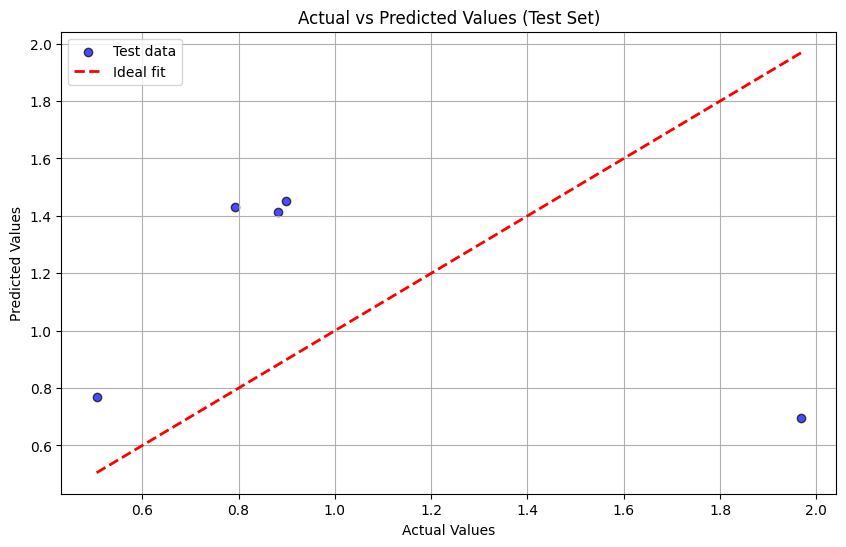

In [108]:
# Evaluate the model with the best parameters on the test set
test_score = best_rf_model.score(X_test_scaled, y_test)
train_score = best_rf_model.score(X_train_scaled, y_train)

#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#print(f'Mean Squared Error: {mse}')
#print(f'R² Score: {r2}')
print(f'R² score on test set: {test_score}')
print(f'R² score on train set: {train_score}')

# Make predictions with the best model
best_rf_pred = best_rf_model.predict(X_test_scaled)

# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_rf_pred, color='blue', edgecolor='k', alpha=0.7, label='Test data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()


In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Create Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters and best estimator
print(f'Best parameters: {grid_search.best_params_}')
best_gb_model = grid_search.best_estimator_

# Evaluate best model
train_score = best_gb_model.score(X_train_scaled, y_train)
test_score = best_gb_model.score(X_test_scaled, y_test)

print(f'R² score on train set: {train_score}')
print(f'R² score on test set: {test_score}')


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
R² score on train set: 0.8061217425814531
R² score on test set: -0.1918993566235665


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid with regularization
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'alpha': [0.1, 0.01, 0.001]  # Regularization parameter for L1 or L2
}

#Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# best parameters & best estimator
print(f'Best parameters: {grid_search.best_params_}')
best_gb_model = grid_search.best_estimator_

# Evaluate
train_score = best_gb_model.score(X_train_scaled, y_train)
test_score = best_gb_model.score(X_test_scaled, y_test)

print(f'R² score on train set: {train_score}')
print(f'R² score on test set: {test_score}')


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best parameters: {'alpha': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
R² score on train set: 0.8061217425814531
R² score on test set: -0.1918993566235665


In [97]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)
# Make predictions on both training and testing data
y_train_pred_gb = gb_model.predict(X_train_scaled)
y_test_pred_gb = gb_model.predict(X_test_scaled)
# Evaluate the Gradient Boosting model
test_score_gb = gb_model.score(X_test_scaled, y_test)
train_score_gb = gb_model.score(X_train_scaled, y_train)

print(f'R² score on test set with Gradient Boosting: {test_score_gb}')
print(f'R² score on train set with Gradient Boosting: {train_score_gb}')


R² score on test set with Gradient Boosting: -0.49581629959368123
R² score on train set with Gradient Boosting: 0.8139987072242991


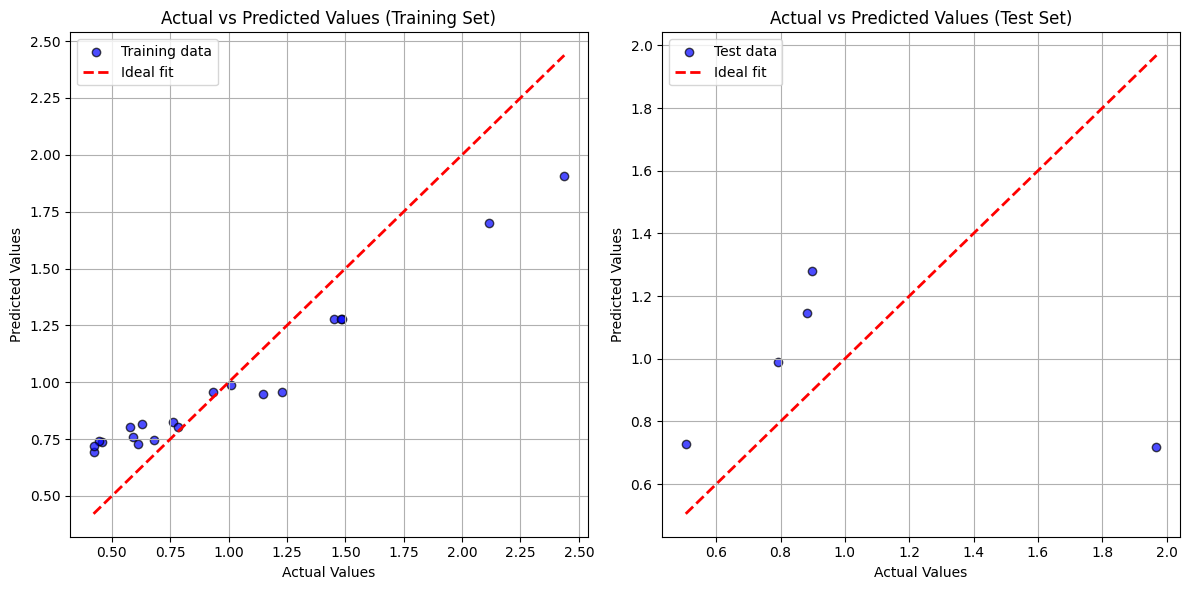

In [103]:
#Plotting actual vs predicted values for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_gb, color='blue', edgecolor='k', alpha=0.7, label='Training data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.legend()
plt.grid(True)

#Plotting actual vs predicted values for  test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_gb, color='blue', edgecolor='k', alpha=0.7, label='Test data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

#Random forest Regression

rg =RandomForestRegressor(n_estimators=9,criterion='squared_error',random_state=42)
rg.fit(X_train_scaled,y_train)
rg.score(X_test, y_test)
rg.score(X_train_scaled,y_train)
print('R^2 is ' + str(rg.score(X_test_scaled, y_test)) + ' for Random Forest Regression(test set)')
print('R^2 is ' + str(rg.score(X_train_scaled, y_train)) + ' for Random Forest Regression(train set)')

# Make predictions
rg_pred = rg.predict(X_test_scaled)

print(rg_pred)


R^2 is -0.5016583993622148 for Random Forest Regression(test set)
R^2 is 0.8384905194451232 for Random Forest Regression(train set)
[1.42434613 1.10881709 0.86108073 1.29172281 0.82922333]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


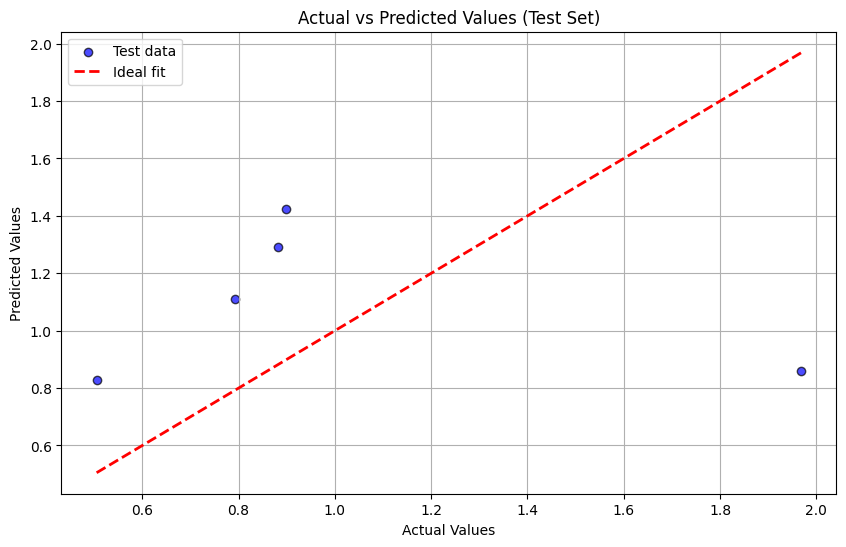

R^2 is -0.5016583993622148 for Random Forest Regression(test set)


In [78]:
import matplotlib.pyplot as plt
# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rg_pred, color='blue', edgecolor='k', alpha=0.7, label='Test data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

print('R^2 is ' + str(rg.score(X_test_scaled, y_test)) + ' for Random Forest Regression(test set)')

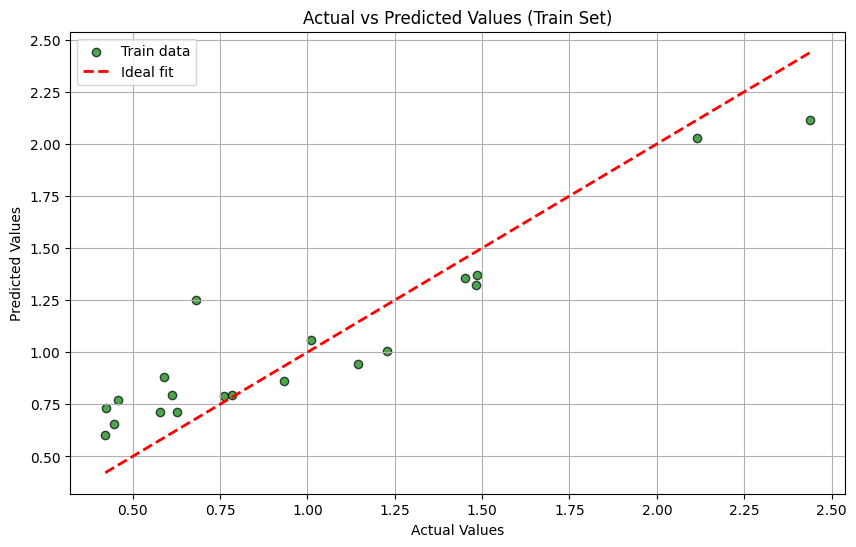

R^2 is 0.8384905194451232 for Random Forest Regression(train set)


In [79]:
# Plot actual vs predicted values for the training set
y_train_pred = rg.predict(X_train_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='green', edgecolor='k', alpha=0.7, label='Train data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Train Set)')
plt.legend()
plt.grid(True)
plt.show()

print('R^2 is ' + str(rg.score(X_train_scaled, y_train)) + ' for Random Forest Regression(train set)')


In [32]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.score(X_test_scaled,y_test)
print('R^2 is ' + str(lr.score(X_test_scaled, y_test)) + ' for Linear Regression')
print('R^2 is ' + str(lr.score(X_train_scaled, y_train)) + ' for Linear Regression')


R^2 is -1.672464705955166 for Linear Regression
R^2 is 0.19468753409569117 for Linear Regression
